<a href="https://colab.research.google.com/github/ohhhanna/PYTORCH_j/blob/main/Simple_Neural_N_W.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

build a basic neural network with pytorch and tensor
using iris dataset

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
#create a model class that inherits nn.Module
#we will use object oriented programming
#create a class and instentiate it
class Model(nn.Module):
  #input layer(4 features of flower) --> hidden layer1(no of neurons) --> he--> output

  def __init__(self,input_feat=4,h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(input_feat,h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2,out_features)

#a fucntion that will move everything forward
  def forward(self, x):
    x= F.relu(self.fc1(x))
    #relu is rectified linear output, if less then 0 make it 0
    x= F.relu(self.fc2(x))
    x= self.out(x)

    return x



In [6]:
#before we run this we need to create a manual seed, so we have a starting point
torch.manual_seed(41)
#create an instance of model
model = Model()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df= pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [12]:
df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [14]:
df['variety']=df['variety'].replace('Setosa',0.0)
df['variety']=df['variety'].replace('Versicolor',1.0)
df['variety']=df['variety'].replace('Virginica',2.0)
df.head()
#give last coloums numerical values

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [16]:
#train test and split
x= df.drop('variety',axis=1)
y= df['variety']

In [17]:
#convert to numpy arrays
X= x.values
Y= y.values

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [28]:
#convert X to float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [33]:
if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy().astype(int)
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy().astype(int)

# Convert y to long tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [35]:
#set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()
#choose optimizer adam, and learning rate= lr (if error doesnt move after multiple epoch, we lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
#what are the parameters fc1, fc2, and out, an epoch will go thru a set of these 3

In [37]:
model.parameters()

<generator object Module.parameters at 0x7b3e19b74190>

In [38]:
#train the model
#how many epochs
epochs = 100
losses = []
for i in range(epochs):
  #forward
  y_pred = model.forward(X_train)

  #measure error or loss
  loss = criterion(y_pred, y_train)

  #keep track of losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

    #backpropagation, take error rate of forward and feed it back
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.1095693111419678
Epoch: 20 and loss: 1.0961166620254517
Epoch: 30 and loss: 1.0845798254013062
Epoch: 40 and loss: 1.0739582777023315
Epoch: 50 and loss: 1.0637890100479126
Epoch: 60 and loss: 1.0539253950119019
Epoch: 70 and loss: 1.0440940856933594
Epoch: 80 and loss: 1.0337880849838257
Epoch: 90 and loss: 1.022811770439148


Text(0.5, 0, 'epoch')

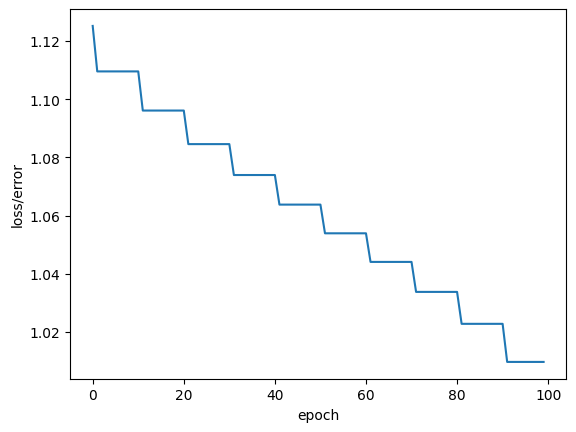

In [39]:
#graph
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

evaluate model on test data set

In [40]:
#turn of backpropagation
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)


In [41]:
loss

tensor(1.0119)

In [45]:
correct = []
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)\

    print(f'{i+1}.) {str(y_val)} \t{y_test[i]} \t {y_val.argmax().item()}')
    #tell us what type of flower our network thinks it is



1.) tensor([0.0828, 0.2474, 0.4371]) 	2 	 2
2.) tensor([0.0608, 0.2200, 0.5882]) 	2 	 2
3.) tensor([0.0192, 0.2061, 0.7187]) 	2 	 2
4.) tensor([0.0914, 0.2466, 0.4340]) 	1 	 2
5.) tensor([0.0436, 0.2227, 0.6060]) 	2 	 2
6.) tensor([0.1031, 0.2560, 0.3943]) 	1 	 2
7.) tensor([0.0629, 0.2417, 0.4988]) 	2 	 2
8.) tensor([0.0832, 0.2444, 0.4551]) 	1 	 2
9.) tensor([0.0514, 0.2310, 0.5581]) 	2 	 2
10.) tensor([0.0457, 0.2079, 0.6628]) 	2 	 2
11.) tensor([0.0673, 0.2401, 0.4928]) 	2 	 2
12.) tensor([0.2033, 0.2958, 0.1126]) 	0 	 1
13.) tensor([0.2103, 0.3077, 0.0444]) 	0 	 1
14.) tensor([0.1358, 0.2799, 0.2410]) 	1 	 1
15.) tensor([0.1838, 0.2927, 0.1522]) 	0 	 1
16.) tensor([0.0780, 0.2399, 0.4747]) 	2 	 2
17.) tensor([0.2039, 0.2997, 0.0876]) 	0 	 1
18.) tensor([0.0781, 0.2412, 0.4648]) 	1 	 2
19.) tensor([0.2124, 0.2976, 0.0875]) 	0 	 1
20.) tensor([0.2017, 0.3121, 0.0465]) 	0 	 1
21.) tensor([0.1274, 0.2698, 0.2953]) 	1 	 2
22.) tensor([0.0402, 0.2124, 0.6569]) 	2 	 2
23.) tensor([0.1806

In [46]:
correct = 0  # Initialize correct as an integer to count the number of correct predictions

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data.unsqueeze(0))  # Add a batch dimension

        predicted_class = y_val.argmax().item()
        actual_class = y_test[i]

        print(f'{i+1}.) Predicted: {predicted_class} \t Actual: {actual_class}')

        # Correct or not
        if predicted_class == actual_class:
            correct += 1

print(f'We got {correct} correct')


1.) Predicted: 2 	 Actual: 2
2.) Predicted: 2 	 Actual: 2
3.) Predicted: 2 	 Actual: 2
4.) Predicted: 2 	 Actual: 1
5.) Predicted: 2 	 Actual: 2
6.) Predicted: 2 	 Actual: 1
7.) Predicted: 2 	 Actual: 2
8.) Predicted: 2 	 Actual: 1
9.) Predicted: 2 	 Actual: 2
10.) Predicted: 2 	 Actual: 2
11.) Predicted: 2 	 Actual: 2
12.) Predicted: 1 	 Actual: 0
13.) Predicted: 1 	 Actual: 0
14.) Predicted: 1 	 Actual: 1
15.) Predicted: 1 	 Actual: 0
16.) Predicted: 2 	 Actual: 2
17.) Predicted: 1 	 Actual: 0
18.) Predicted: 2 	 Actual: 1
19.) Predicted: 1 	 Actual: 0
20.) Predicted: 1 	 Actual: 0
21.) Predicted: 2 	 Actual: 1
22.) Predicted: 2 	 Actual: 2
23.) Predicted: 1 	 Actual: 0
24.) Predicted: 1 	 Actual: 0
25.) Predicted: 2 	 Actual: 1
26.) Predicted: 2 	 Actual: 1
27.) Predicted: 2 	 Actual: 1
28.) Predicted: 2 	 Actual: 1
29.) Predicted: 1 	 Actual: 0
30.) Predicted: 2 	 Actual: 1
We got 11 correct
